# **Author : Desca Winta Harefa**
# **Tugas : Tugas Olah Data Penjualan**


# 1. Tugas pertama, lakukan cleaning dataset terlebih dahulu untuk mendeteksi dan memperbaiki (atau menghapus) suatu record yang 'corrupt' atau tidak akurat!


**Melakukan Import Data dan Cek data**

In [ ]:
# Mengimport library yang dibutuhkan
# Berfungsi untuk memanipulasi dan menganalisis data
from google.colab import files
import pandas as pd

# Mengunggah file
uploaded = files.upload()

Saving supermarket_sales.csv to supermarket_sales.csv


In [ ]:
# Memuat data yang telah diupload
data = pd.read_csv(next(iter(uploaded)), encoding="Windows-1254")

In [ ]:
# Mengecek isi dari data
data.head(2)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6


In [ ]:
# Mengimport data yang dibutuhkan
# Berfungsi untuk komputasi ilmiah atau matematika
import numpy as np

# Mengidentifikasi dan Menangani Nilai yang Hilang
# Menghitung jumlah nilai yang hilang di setiap kolom
data_kosong = data.isnull().sum()
print("Nilai yang kosong pada setiap kolom sebelum dilakukan pembersihan data:\n", data_kosong)

Nilai yang kosong pada setiap kolom sebelum dilakukan pembersihan data:
 Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64


In [ ]:
# Mendeteksi dan Penanganan Anomali
# Misalnya nih: Memastikan kolom "Rating" berada dalam rentang 0-10
# Jika ada anomali, kita bisa set nilai tersebut ke nilai yang masuk akal (misalnya median atau mean)
data.loc[(data['Rating'] < 0) | (data['Rating'] > 10), 'Rating'] = data['Rating'].median()

In [ ]:
# Memvalidasi Tipe Data
# Mengecek tipe data dari setiap kolom
print("Tipe data sebelum dilakukan konversi:\n", data.dtypes)

Tipe data sebelum dilakukan konversi:
 Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object


In [ ]:
# Konversi tipe data sesuai kebutuhan
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
data['Time'] = pd.to_datetime(data['Time'], format='%H:%M:%S', errors='coerce').dt.time
data[['Unit price', 'Quantity', 'Tax 5%', 'Total', 'cogs', 'gross income']] = data[['Unit price', 'Quantity', 'Tax 5%', 'Total', 'cogs', 'gross income']].apply(pd.to_numeric, errors='coerce')


In [ ]:
# Mengecek data kembali
data.head(3)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,NaT,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,NaT,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,NaT,Credit card,324.31,4.761905,16.2155,7.4


In [ ]:
# Mengecek kembali tipe data dari setiap kolom
print("Tipe data sebelum dilakukan konversi:\n", data.dtypes)

Tipe data sebelum dilakukan konversi:
 Invoice ID                         object
Branch                             object
City                               object
Customer type                      object
Gender                             object
Product line                       object
Unit price                        float64
Quantity                            int64
Tax 5%                            float64
Total                             float64
Date                       datetime64[ns]
Time                       datetime64[ns]
Payment                            object
cogs                              float64
gross margin percentage           float64
gross income                      float64
Rating                            float64
dtype: object


# 2. Tugas kedua, dari dataset penjualan yang telah disajikan, gunakan fungsi dasar pemrograman Python untuk mencari data di bawah ini!

**a. Data branch yang memiliki Rating paling tinggi**

In [ ]:
# Mencari Rating yang Tertinggi
rating_tinggi = data['Rating'].max()

In [ ]:
# Mencari Branch dengan Rating Tertinggi
branch_rating = data[data['Rating'] == rating_tinggi]['Branch'].unique()

In [ ]:
# Mengurutkan Branch Berdasarkan Urutan Alfabet
branch_urut = sorted(branch_rating)

In [ ]:
# Output dari pencarian Rating & Branch
print("Rating tertinggi:", rating_tinggi)
print("Branch dengan rating tertinggi:", branch_urut)

Rating tertinggi: 10.0
Branch dengan rating tertinggi: ['A', 'B', 'C']


**b. Data product line yang memiliki gross income paling besar**

In [ ]:
# Mengelompokkan Data berdasarkan Product Line dan Menghitung Gross Income Tertinggi
produk_tertinggi = data.groupby('Product line')['gross income'].max()

In [ ]:
# Menemukan Produk dengan Gross Income Tertinggi
tertinggi = produk_tertinggi.idxmax()
hasil_tertinggi = produk_tertinggi.max()

In [ ]:
# Output dari Rating & Branch tertinggi
print("Produk dengan pendapatan kotor tertinggi:", tertinggi)
print("Pendapatan kotor tertinggi:", hasil_tertinggi)

Produk dengan pendapatan kotor tertinggi: Fashion accessories
Pendapatan kotor tertinggi: 49.65


# 3. Tugas ketiga, buatlah pie chart yang membandingkan banyaknya pembeli laki-laki dan perempuan!

In [ ]:
# Mengimport library yang dibutuhkan
# Berfungsi untuk membuat berbagai jenis visualisasi data seperti grafik
import matplotlib.pyplot as plt

**1. Grafik Pie berdasarkan Branch**

##### Grafik Pie berdasarkan Tiap-tiap data di Branch

In [ ]:
# Mengetahui Isi Data di dalam Kolom 'Branch'
tiap_branch = data['Branch'].unique()

# Menampilkan Isi Data di dalam Kolom 'Branch'
print("Isi data di dalam kolom 'Branch':")
for i in tiap_branch:
    print(i)

Isi data di dalam kolom 'Branch':
A
C
B


In [ ]:
# Menghitung jumlah pembelian laki-laki dan perempuan
# Setiap kategori Branch
jml_gender = data.groupby(['Branch', 'Gender']).size().unstack(fill_value=0)

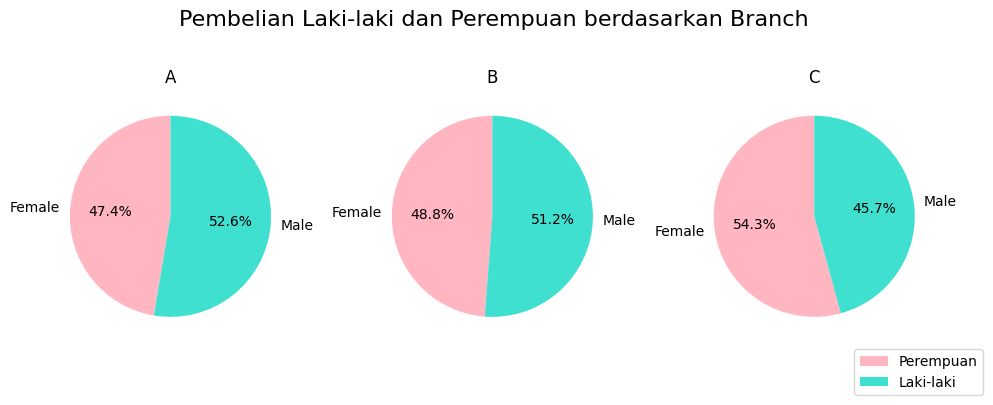

In [ ]:
from inspect import EndOfBlock
# Membuat grafik pie
# Membandingkan pembelian antara laki-laki dan perempuan
# Setiap kategori Branch
plt.figure(figsize=(10, 8))
colors = ['lightpink', 'turquoise']

for a in jml_gender.index:
    plt.subplot(2, 3, list(jml_gender.index).index(a) + 1)
    plt.pie(jml_gender.loc[a], labels=jml_gender.columns, autopct='%1.1f%%', colors=colors, startangle=90)
    plt.title(a)

# Menambahkan judul utama untuk keseluruhan figure
plt.suptitle('Pembelian Laki-laki dan Perempuan berdasarkan Branch', fontsize=16)

# Menambahkan keterangan dengan penyesuaian posisi
plt.legend(['Perempuan', 'Laki-laki'], loc='upper right', bbox_to_anchor=(1.2, 0))

plt.tight_layout()
plt.show()

**2. Grafik Pie berdasarkan Product line**

##### Grafik Pie berdasarkan Tiap-tiap data di Product Line

In [ ]:
# Mengetahui Isi Data di dalam Kolom 'Product Line'
tiap_product = data['Product line'].unique()

# Menampilkan Isi Data di dalam Kolom 'Product Line'
print("Isi data di dalam kolom 'Product Line':")
for i in tiap_product:
    print(i)

Isi data di dalam kolom 'Product Line':
Health and beauty
Electronic accessories
Home and lifestyle
Sports and travel
Food and beverages
Fashion accessories


In [ ]:
# Menghitung jumlah pembelian laki-laki dan perempuan
# Setiap kategori Product Line
jumlah_gender = data.groupby(['Product line', 'Gender']).size().unstack(fill_value=0)

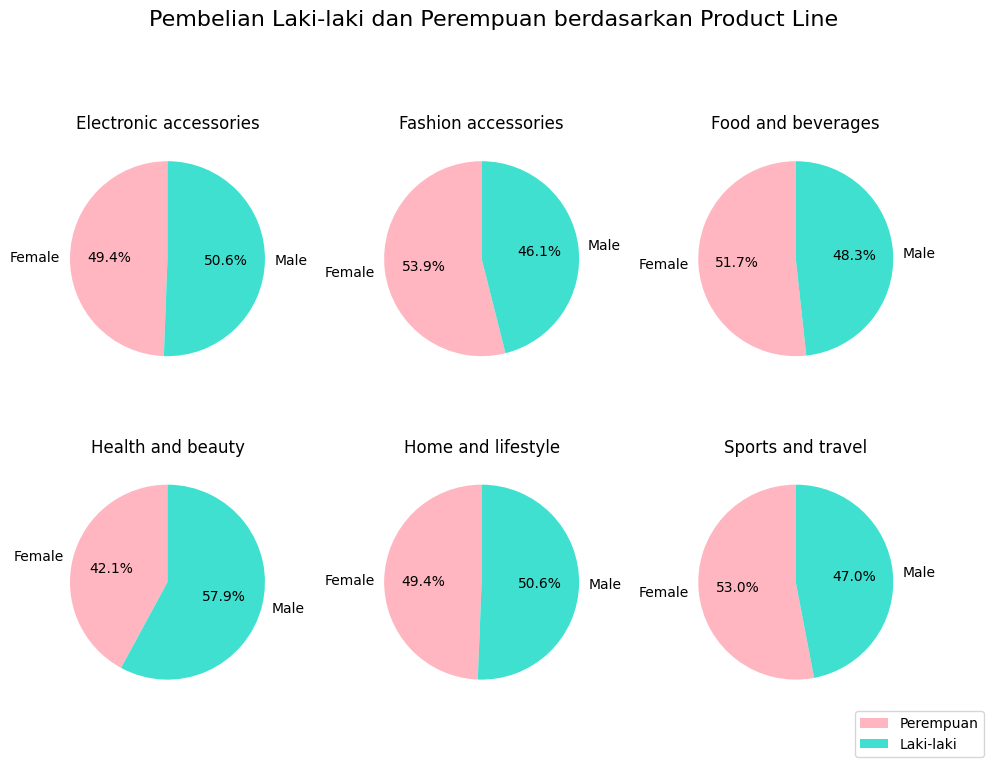

In [ ]:
# Membuat grafik pie
# Membandingkan pembelian antara laki-laki dan perempuan
# Setiap kategori Product Line
plt.figure(figsize=(10, 8))
colors = ['lightpink', 'turquoise']

for b in jumlah_gender.index:
    plt.subplot(2, 3, list(jumlah_gender.index).index(b) + 1)
    plt.pie(jumlah_gender.loc[b], labels=jumlah_gender.columns, autopct='%1.1f%%', colors=colors, startangle=90)
    plt.title(b)

# Menambahkan judul utama untuk keseluruhan figure
plt.suptitle('Pembelian Laki-laki dan Perempuan berdasarkan Product Line\n\n', fontsize=16)

# Menambahkan keterangan dengan penyesuaian posisi
plt.legend(['Perempuan', 'Laki-laki'], loc='upper right', bbox_to_anchor=(1.3, 0))

plt.tight_layout()
plt.show()

**3. Grafik Pie berdasarkan Tipe Customer type**

##### Grafik Pie berdasarkan Keseluruhan data di Customer Type

In [ ]:
#Menyiapkan Data untuk Grafik
jumlah_customer = data.groupby('Customer type')['Gender'].value_counts().unstack()

In [ ]:
# Menggabungkan Jumlah Laki-laki dan Perempuan
jumlah_customer['Total'] = jumlah_customer['Female'] + jumlah_customer['Male']

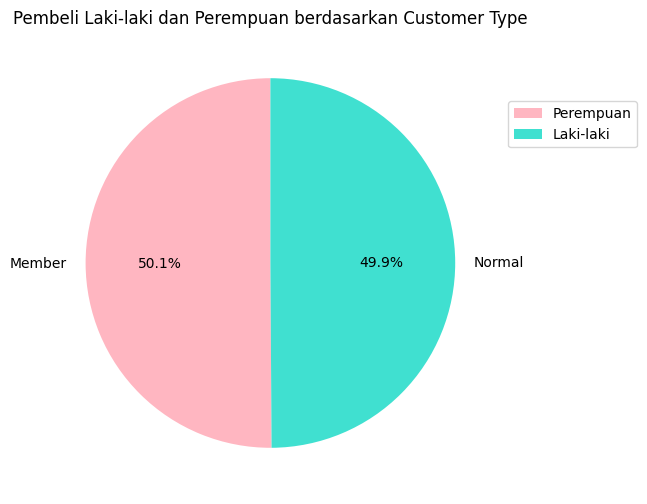

In [ ]:
#Membuat Grafik Pie
plt.figure(figsize=(6, 6))
colors = ['lightpink', 'turquoise']
plt.pie(jumlah_customer['Total'], labels=jumlah_customer.index, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Pembeli Laki-laki dan Perempuan berdasarkan Customer Type')

# Menambahkan keterangan
plt.legend(['Perempuan', 'Laki-laki'], loc='center left', bbox_to_anchor=(1, 0.8))

plt.show()

##### Grafik Pie berdasarkan Tiap-tiap data di Customer Type

In [ ]:
# Mengetahui Isi Data di dalam Kolom 'Customer Type'
tiap_customer = data['Customer type'].unique()

# Menampilkan Isi Data di dalam Kolom 'Customer Type'
print("Isi data di dalam kolom 'Customer Type':")
for i in tiap_customer:
    print(i)

Isi data di dalam kolom 'Customer Type':
Member
Normal


In [ ]:
# Menghitung jumlah pembelian laki-laki dan perempuan
# Setiap kategori Customer Type
jlh_gender = data.groupby(['Customer type', 'Gender']).size().unstack(fill_value=0)

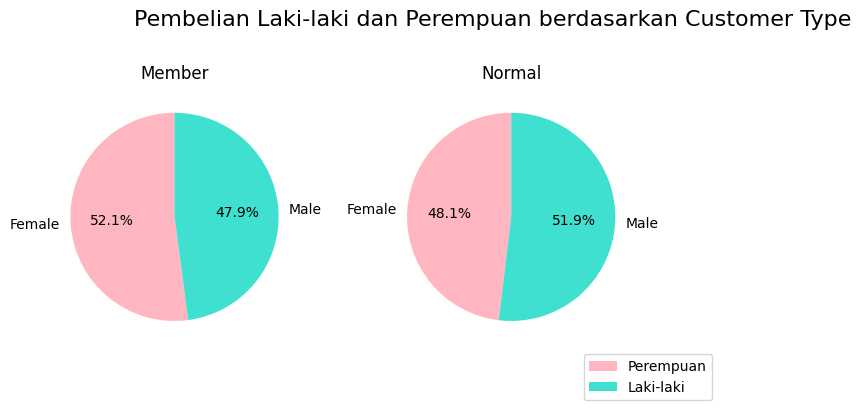

In [ ]:
# Membuat grafik pie
# Membandingkan pembelian antara laki-laki dan perempuan
# Setiap kategori Customer Type
plt.figure(figsize=(10, 8))
colors = ['lightpink', 'turquoise']

for c in jlh_gender.index:
    plt.subplot(2, 3, list(jlh_gender.index).index(c) + 1)
    plt.pie(jlh_gender.loc[c], labels=jlh_gender.columns, autopct='%1.1f%%', colors=colors, startangle=90)
    plt.title(c)

# Menambahkan judul utama untuk keseluruhan figure
plt.suptitle('Pembelian Laki-laki dan Perempuan berdasarkan Customer Type', fontsize=16)

# Menambahkan keterangan dengan penyesuaian posisi
plt.legend(['Perempuan', 'Laki-laki'], loc='upper right', bbox_to_anchor=(1.3, 0))

plt.tight_layout()
plt.show()

**4. Grafik Pie berdasarkan Tipe Unit Price**

In [ ]:
# Menyiapkan Data untuk Grafik
jumlah_price = data.groupby('Quantity')['Gender'].value_counts().unstack()

In [ ]:
# Menghitung rata-rata Quantity untuk setiap gender
rata_price = data.groupby('Gender')['Quantity'].mean()

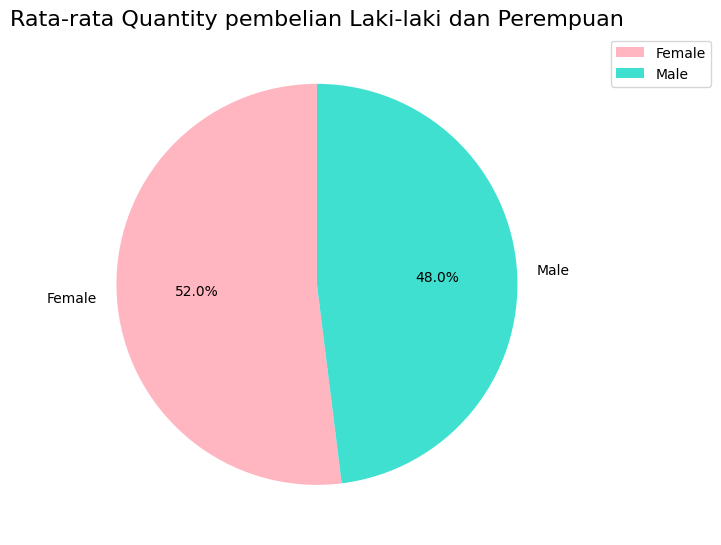

In [ ]:
# Membuat grafik pie untuk membandingkan rata-rata Quantity antara laki-laki dan perempuan
plt.figure(figsize=(7, 7))
colors = ['lightpink', 'turquoise']

plt.pie(rata_price, labels=rata_price.index, autopct='%1.1f%%', colors=colors, startangle=90)

# Menambahkan judul utama untuk keseluruhan figure
plt.title('Rata-rata Quantity pembelian Laki-laki dan Perempuan', fontsize=16)

# Menambahkan keterangan dengan penyesuaian posisi
plt.legend(rata_price.index, loc='upper right', bbox_to_anchor=(1.3, 1))

plt.tight_layout()
plt.show()

**5. Grafik Pie berdasarkan Tipe Payment**

##### Grafik Pie berdasarkan Tiap-tiap data di Payment

In [ ]:
# Mengetahui Isi Data di dalam Kolom 'Payment'
tiap_payment = data['Payment'].unique()

# Menampilkan Isi Data di dalam Kolom 'Payment'
print("Isi data di dalam kolom 'Payment':")
for i in tiap_payment:
    print(i)

Isi data di dalam kolom 'Payment':
Ewallet
Cash
Credit card


In [ ]:
# Menghitung jumlah pembelian laki-laki dan perempuan
# Setiap kategori Payment
jmlh_gender = data.groupby(['Payment', 'Gender']).size().unstack(fill_value=0)

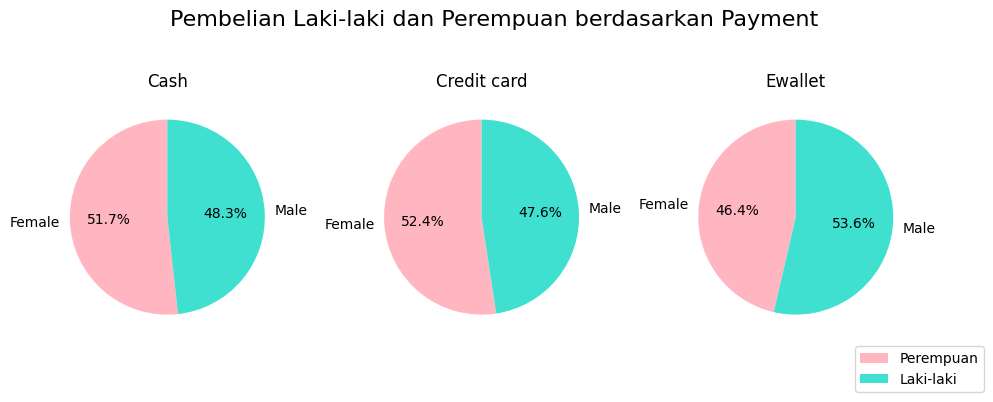

In [ ]:
# Membuat grafik pie
# Membandingkan pembelian antara laki-laki dan perempuan
# Setiap kategori Payment
plt.figure(figsize=(10, 8))
colors = ['lightpink', 'turquoise']

for d in jmlh_gender.index:
    plt.subplot(2, 3, list(jmlh_gender.index).index(d) + 1)
    plt.pie(jmlh_gender.loc[d], labels=jmlh_gender.columns, autopct='%1.1f%%', colors=colors, startangle=90)
    plt.title(d)

# Menambahkan judul utama untuk keseluruhan figure
plt.suptitle('Pembelian Laki-laki dan Perempuan berdasarkan Payment', fontsize=16)

# Menambahkan Legenda dengan Penyesuaian Posisi
plt.legend(['Perempuan', 'Laki-laki'], loc='upper right', bbox_to_anchor=(1.3, 0))

plt.tight_layout()
plt.show()

**6. Grafik Pie berdasarkan City**

##### Grafik Pie berdasarkan Tiap-tiap data di City

In [ ]:
# Mengetahui Isi Data di dalam Kolom 'City'
tiap_city = data['City'].unique()

# Menampilkan Isi Data di dalam Kolom 'City'
print("Isi data di dalam kolom 'City':")
for i in tiap_city:
    print(i)

Isi data di dalam kolom 'City':
Yangon
Naypyitaw
Mandalay


In [ ]:
# Menghitung jumlah pembelian laki-laki dan perempuan
# Setiap kategori City
j_gender = data.groupby(['City', 'Gender']).size().unstack(fill_value=0)

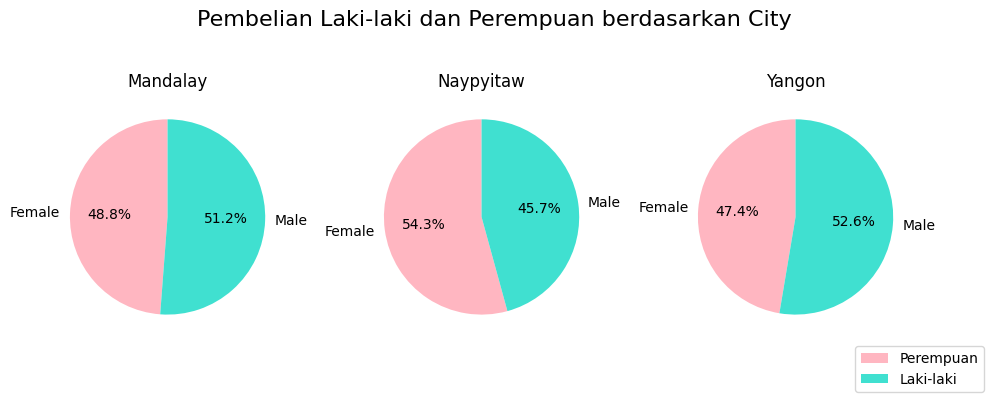

In [ ]:
# Membuat grafik pie
# Membandingkan pembelian antara laki-laki dan perempuan
# Setiap kategori City
plt.figure(figsize=(10, 8))
colors = ['lightpink', 'turquoise']

for e in j_gender.index:
    plt.subplot(2, 3, list(j_gender.index).index(e) + 1)
    plt.pie(j_gender.loc[e], labels=j_gender.columns, autopct='%1.1f%%', colors=colors, startangle=90)
    plt.title(e)

# Menambahkan judul utama untuk keseluruhan figure
plt.suptitle('Pembelian Laki-laki dan Perempuan berdasarkan City', fontsize=16)

# Menambahkan keterangan dengan penyesuaian posisi
plt.legend(['Perempuan', 'Laki-laki'], loc='upper right', bbox_to_anchor=(1.3, 0))

plt.tight_layout()
plt.show()

# Tugas keempat, hitunglah revenue penjualan secara keseluruhan. Lalu buatlah bar chart yang berisi total revenue tersebut!
####Rumus menghitung revenue = unit price x quantity

**1. Total Revenue dari data Keseluruhan**

In [ ]:
# Menghitung total revenue penjualan secara keseluruhan
total_revenue = (data['Unit price'] * data['Quantity']).sum()

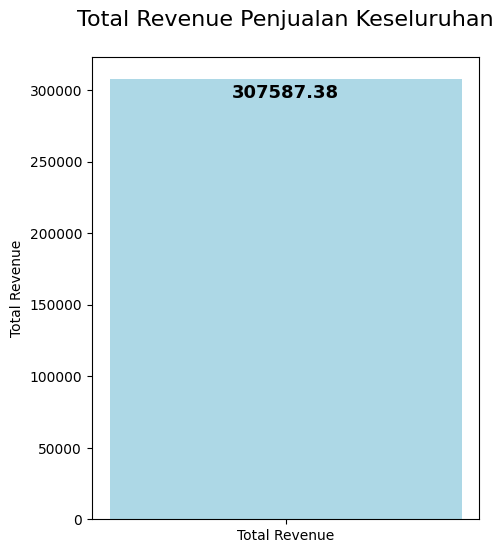

In [ ]:
# Membuat bar chart untuk total revenue
plt.figure(figsize=(5, 6))
grafik  =  plt.bar(["Total Revenue"], [total_revenue], color='lightblue')

# Menambahkan nilai di dalam grafik batang
for a in grafik:
    yval = a.get_height()
    plt.text(a.get_x() + a.get_width()/2, yval + -0.01 * yval, round(yval, 2), va='top', ha='center', fontweight='bold', fontsize=13)

# Menambahkan judul dan label sumbu
plt.title('Total Revenue Penjualan Keseluruhan\n', fontsize=16)
plt.ylabel('Total Revenue', fontsize=10)

# Menampilkan bar chart
plt.show()

**2. Total Revenue dari data Branch**

In [ ]:
# Menghitung revenue
data['Revenue'] = data['Unit price'] * data['Quantity']

In [ ]:
# Menghitung total revenue untuk setiap Branch
total_revenue_branch = data.groupby('Branch')['Revenue'].sum()

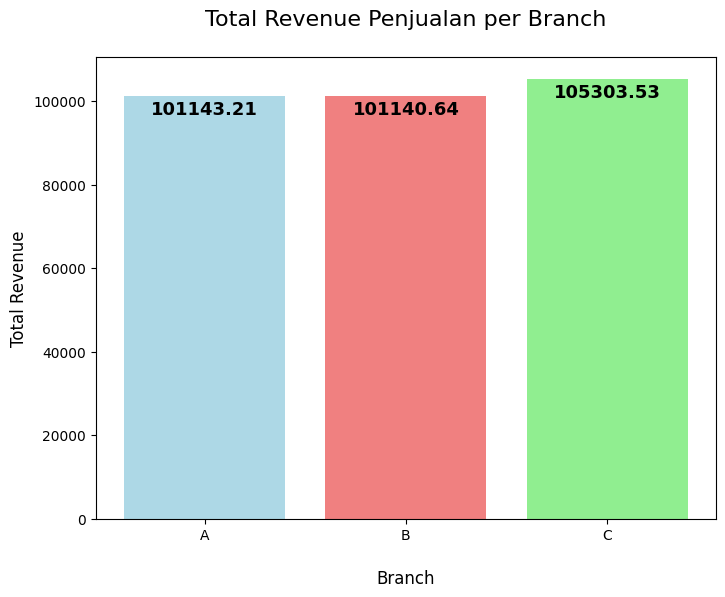

In [120]:
# Membuat bar chart untuk total revenue per Branch
plt.figure(figsize=(8, 6))
bars = plt.bar(total_revenue_branch.index, total_revenue_branch.values, color = ['lightblue', 'lightcoral', 'lightgreen'])

# Menambahkan nilai di dalam grafik batang dengan jarak
for i, a in enumerate(bars):
    yval = a.get_height()
    plt.text(a.get_x() + a.get_width()/2, yval + -0.01 * yval, round(yval, 2), va='top', ha='center', fontweight='bold', fontsize=13)

# Menambahkan judul dan label sumbu
plt.title('Total Revenue Penjualan per Branch\n', fontsize=16)
plt.xlabel('\nBranch', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)

# Menampilkan bar chart
plt.show()

**3. Total Revenue dari data City**

In [ ]:
# Menghitung revenue
data['Revenue'] = data['Unit price'] * data['Quantity']

In [ ]:
# Menghitung total revenue untuk setiap City
total_revenue_city = data.groupby('City')['Revenue'].sum()

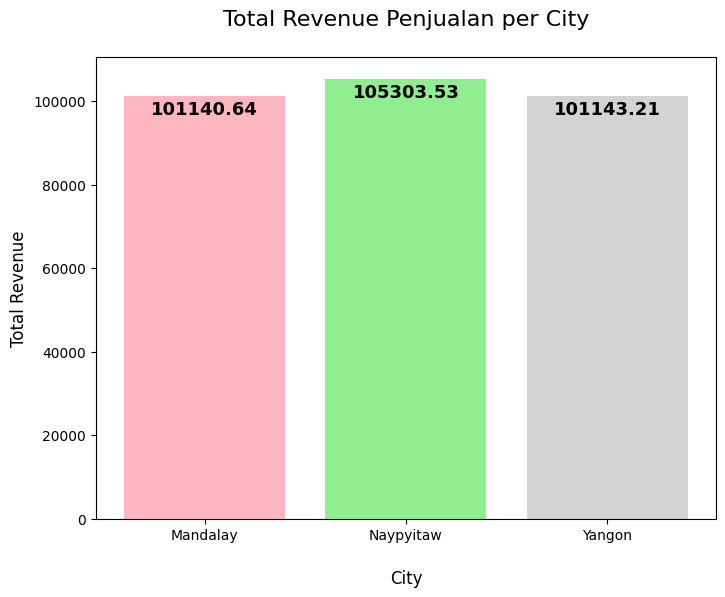

In [ ]:
# Membuat bar chart untuk total revenue per City
plt.figure(figsize=(8, 6))
barrs = plt.bar(total_revenue_city.index, total_revenue_city.values, color=['lightpink', 'lightgreen', 'lightgray'])

# Menambahkan nilai di dalam grafik batang dengan jarak
for i, a in enumerate(barrs):
    yval = a.get_height()
    plt.text(a.get_x() + a.get_width()/2, yval + -0.01 * yval, round(yval, 2), va='top', ha='center', fontweight='bold', fontsize=13)

# Menambahkan judul dan label sumbu
plt.title('Total Revenue Penjualan per City\n', fontsize=16)
plt.xlabel('\nCity', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)

# Menampilkan bar chart
plt.show()

**4. Total Revenue dari data Product Line**

In [ ]:
# Menghitung revenue
data['Revenue'] = data['Unit price'] * data['Quantity']

In [ ]:
# Menghitung total revenue untuk setiap Product Line
total_revenue_city = data.groupby('Product line')['Revenue'].sum()

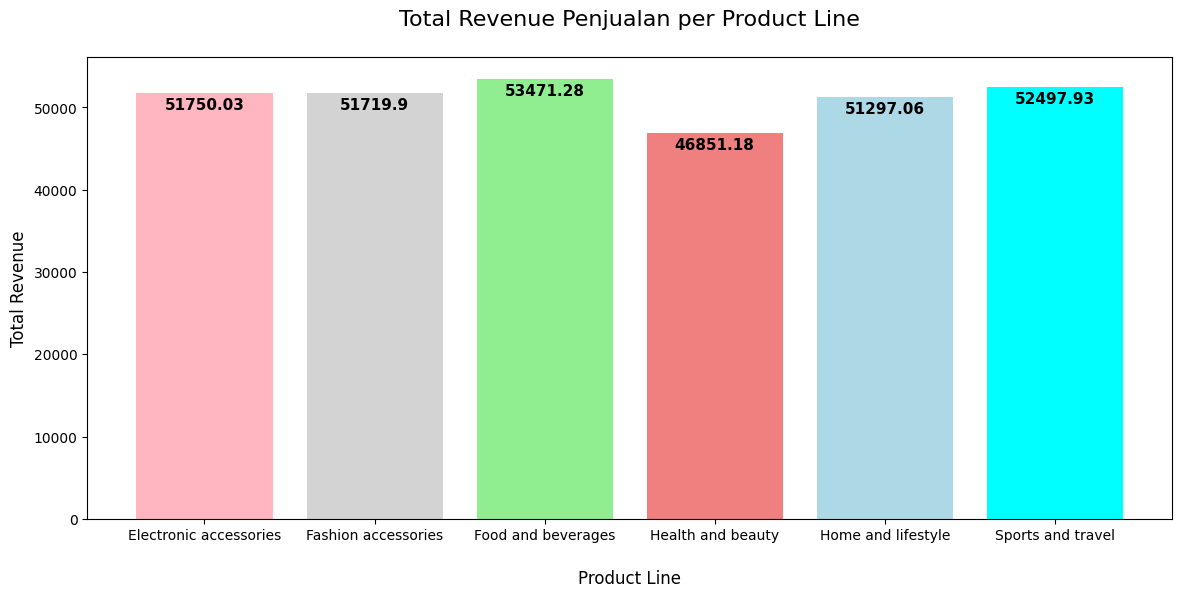

In [119]:
# Membuat bar chart untuk total revenue per Product Line
plt.figure(figsize=(14, 6))
barrs = plt.bar(total_revenue_city.index, total_revenue_city.values, color=['lightpink', 'lightgray', 'lightgreen', 'lightcoral', 'lightblue', 'aqua'])

# Menambahkan nilai di dalam grafik batang dengan jarak
for i, a in enumerate(barrs):
    yval = a.get_height()
    plt.text(a.get_x() + a.get_width()/2, yval + -0.01 * yval, round(yval, 2), va='top', ha='center', fontweight='bold', fontsize=11)

# Menambahkan judul dan label sumbu
plt.title('Total Revenue Penjualan per Product Line\n', fontsize=16)
plt.xlabel('\nProduct Line', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)

# Menampilkan bar chart
plt.show()